In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("bikes_rent.csv")
print(df.head())

   season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed(mph)  windspeed(ms)   cnt  
0  18.18125  80.5833       10.749882       4.805490   985  
1  17.68695  69.6087       16.652113       7.443949   801  
2   9.47025  43.7273       16.636703       7.437060  1349  
3  10.60610  59.0435       10.739832       4.800998  1562  
4  11.46350  43.6957       12.522300       5.597810  1600  


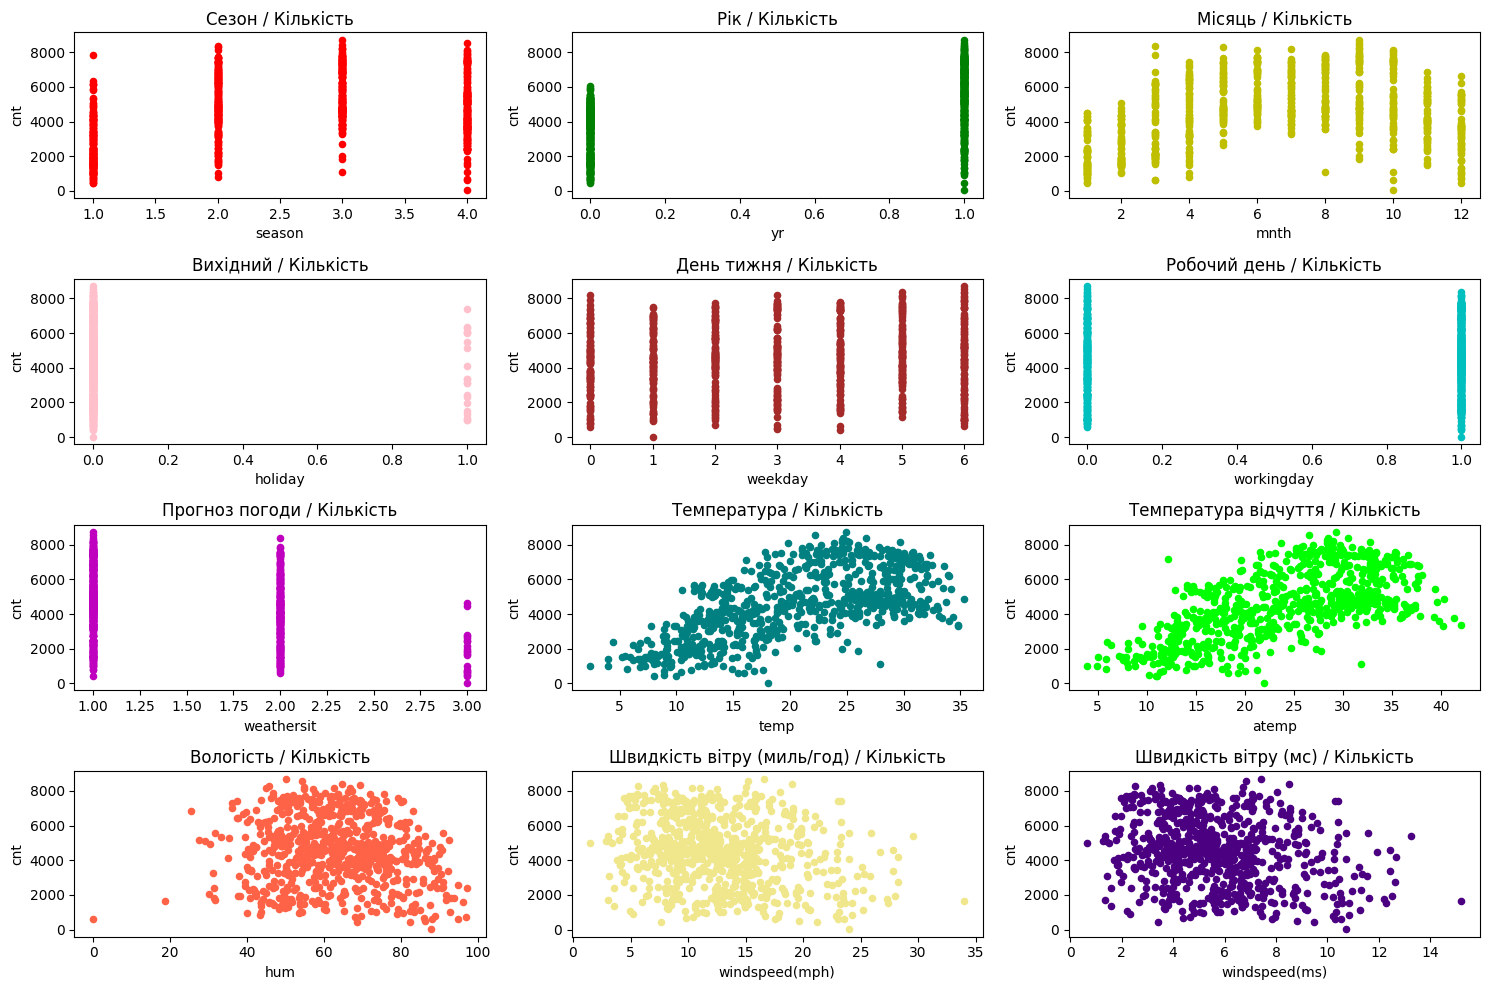

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
df.plot(kind='scatter', x='season', y='cnt', color='r', ax=axes[0, 0])
df.plot(kind='scatter', x='yeat', y='cnt', color='g', ax=axes[0, 1])
df.plot(kind='scatter', x='month', y='cnt', color='y', ax=axes[0, 2])
df.plot(kind='scatter', x='holiday', y='cnt', color='pink', ax=axes[1, 0])
df.plot(kind='scatter', x='weekday', y='cnt', color='brown', ax=axes[1, 1])
df.plot(kind='scatter', x='workingday', y='cnt', color='c', ax=axes[1, 2])
df.plot(kind='scatter', x='weathersit', y='cnt', color='m', ax=axes[2, 0])
df.plot(kind='scatter', x='temp', y='cnt', color='teal', ax=axes[2, 1])
df.plot(kind='scatter', x='atemp', y='cnt', color='lime', ax=axes[2, 2])
df.plot(kind='scatter', x='humidity', y='cnt', color='tomato', ax=axes[3, 0])
df.plot(kind='scatter', x='windspeed(mph)', color='khaki', y='cnt', ax=axes[3, 1])
df.plot(kind='scatter', x='windspeed(ms)', y='cnt', color='indigo', ax=axes[3, 2])
axes[0, 0].set_title('Сезон / Кількість')
axes[0, 1].set_title('Рік / Кількість')
axes[0, 2].set_title('Місяць / Кількість')
axes[1, 0].set_title('Свято / Кількість')
axes[1, 1].set_title('День тижня / Кількість')
axes[1, 2].set_title('Робочий день / Кількість')
axes[2, 0].set_title('Прогноз погоди / Кількість')
axes[2, 1].set_title('Температура / Кількість')
axes[2, 2].set_title('Температура відчуття / Кількість')
axes[3, 0].set_title('Вологість / Кількість')
axes[3, 1].set_title('Швидкість вітру (миль/год) / Кількість')
axes[3, 2].set_title('Швидкість вітру (мс) / Кількість')
plt.tight_layout()
plt.show()

•  Характер залежності кількості прокатів від місяця є неоднозначним. На графіку "Місяць / Кількість" можна помітити, що ця залежність має форму сезонної кривої. Кількість прокатів сильно зростає влітку і зменшується взимку, що відображає сезонні варіації. Таким чином, залежність між місяцем і кількістю прокатів не є лінійною. Вона більше схожа на криву.

•  Ознаки, від яких кількість прокатів швидше за все залежить лінійно, включають температуру (`temp`) і температуру по відчуттях (`atemp`). На відповідних графіках "Темперутура / Кількість" і "Температура відчуття / Кількість" можна помітити, що кількість прокатів зазвичай збільшується зі збільшенням температури. Ця залежність може бути лінійною, оскільки існує загальна тенденція до зростання кількості прокатів зі збільшенням температури.

In [5]:
correlations = df.iloc[:, :-1].corrwith(df['cnt'])
print(correlations)

season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545
dtype: float64


In [6]:
correlations = df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].corr()
print(correlations)

                    temp     atemp       hum  windspeed(mph)  windspeed(ms)  \
temp            1.000000  0.991702  0.126963       -0.157944      -0.157944   
atemp           0.991702  1.000000  0.139988       -0.183643      -0.183643   
hum             0.126963  0.139988  1.000000       -0.248489      -0.248489   
windspeed(mph) -0.157944 -0.183643 -0.248489        1.000000       1.000000   
windspeed(ms)  -0.157944 -0.183643 -0.248489        1.000000       1.000000   
cnt             0.627494  0.631066 -0.100659       -0.234545      -0.234545   

                     cnt  
temp            0.627494  
atemp           0.631066  
hum            -0.100659  
windspeed(mph) -0.234545  
windspeed(ms)  -0.234545  
cnt             1.000000  


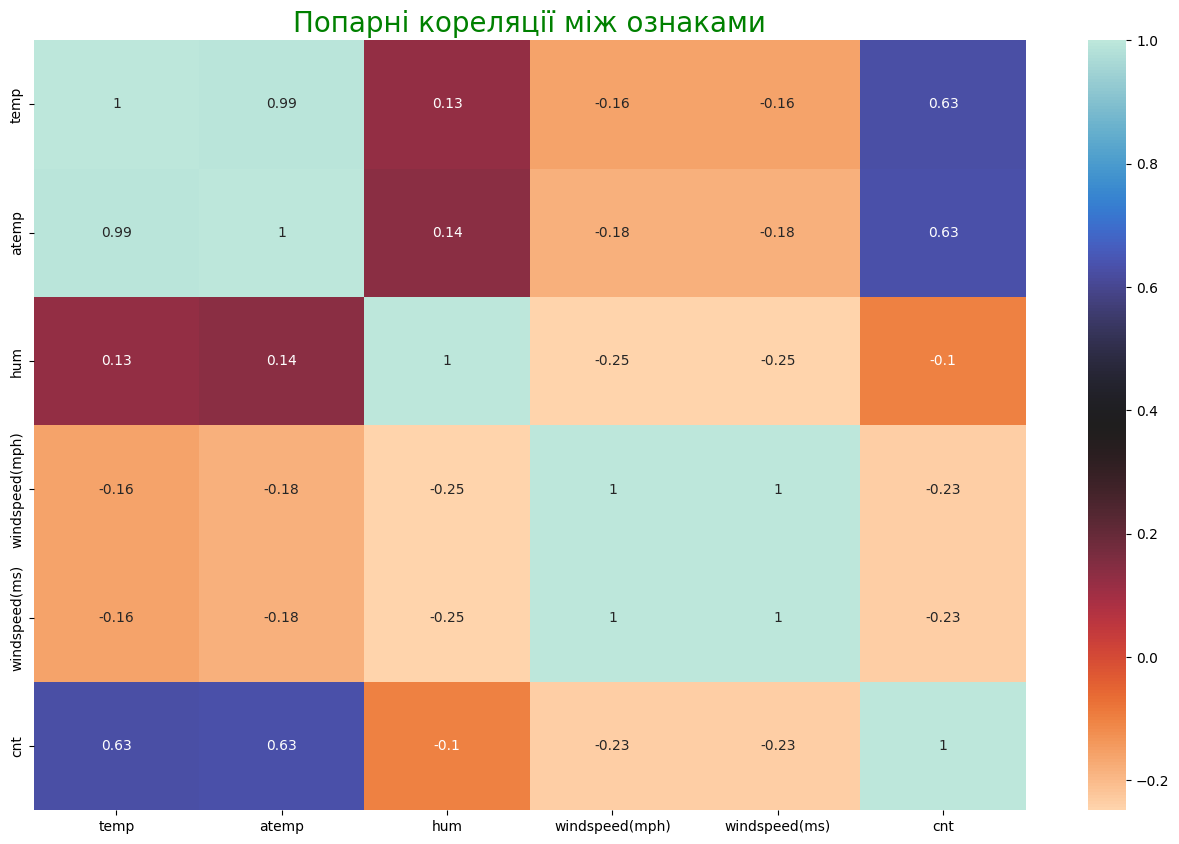

In [7]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(df.iloc[:, 7:].corr(), annot=True, cmap='icefire_r')
plt.title('Попарні кореляції між ознаками', fontsize=20, color='g')
plt.show()

In [8]:
mean_features = df.mean()
print(mean_features)

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64


In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X = df.drop(columns=['cnt'])
y = df['cnt']
regressor.fit(X, y)
feature_names = df.columns[:-1]
coefficients = regressor.coef_
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

season: 514.2755144217309
yr: 2043.9358557550588
mnth: -40.96296224733487
holiday: -519.3879461125579
weekday: 68.49550444316866
workingday: 121.29150193414044
weathersit: -606.453249792301
temp: 48.99538908049351
atemp: 71.91493309746625
hum: -10.23058594991835
windspeed(mph): 2401064826724.129
windspeed(ms): -5371182017466.677


In [11]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X, y)
ridge_coefficients = ridge_regressor.coef_
print("Ridge регресор:")
for feature, coefficient in zip(feature_names, ridge_coefficients):
    print(f"{feature}: {coefficient}")

Ridge регресор:
season: 507.8018818505639
yr: 2029.08905419705
mnth: -38.47089727912119
holiday: -493.27801548382104
weekday: 69.11396965165959
workingday: 121.52442502929453
weathersit: -605.2055553731528
temp: 49.31676759598563
atemp: 71.78598727334753
hum: -10.383394500484648
windspeed(mph): -31.93550169429181
windspeed(ms): -14.276040263826614


In [12]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso()
lasso_regressor.fit(X, y)
lasso_coefficients = lasso_regressor.coef_
print("Lasso регресор:")
for feature, coefficient in zip(feature_names, lasso_coefficients):
    print(f"{feature}: {coefficient}")

Lasso регресор:
season: 506.5512786498074
yr: 2036.2316676979037
mnth: -38.07827028932167
holiday: -484.65194618654056
weekday: 68.93837479133958
workingday: 118.4475975866837
weathersit: -604.5667118927049
temp: 51.363260585616366
atemp: 69.91273749012187
hum: -10.352705204636573
windspeed(mph): -38.34106761310847
windspeed(ms): -0.0


In [13]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge()
ridge_regressor.fit(X, y)
ridge_coefficients = ridge_regressor.coef_
print("Ridge регресор:")
for feature, coefficient in zip(feature_names, ridge_coefficients):
    print(f"{feature}: {coefficient}")

Ridge регресор:
season: 507.8018818505639
yr: 2029.08905419705
mnth: -38.47089727912119
holiday: -493.27801548382104
weekday: 69.11396965165959
workingday: 121.52442502929453
weathersit: -605.2055553731528
temp: 49.31676759598563
atemp: 71.78598727334753
hum: -10.383394500484648
windspeed(mph): -31.93550169429181
windspeed(ms): -14.276040263826614


In [14]:
alphas = [0.1, 1, 10, 100, 1000]

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefs_lasso.append(lasso_regressor.coef_)
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X, y)
    coefs_ridge.append(ridge_regressor.coef_)
coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

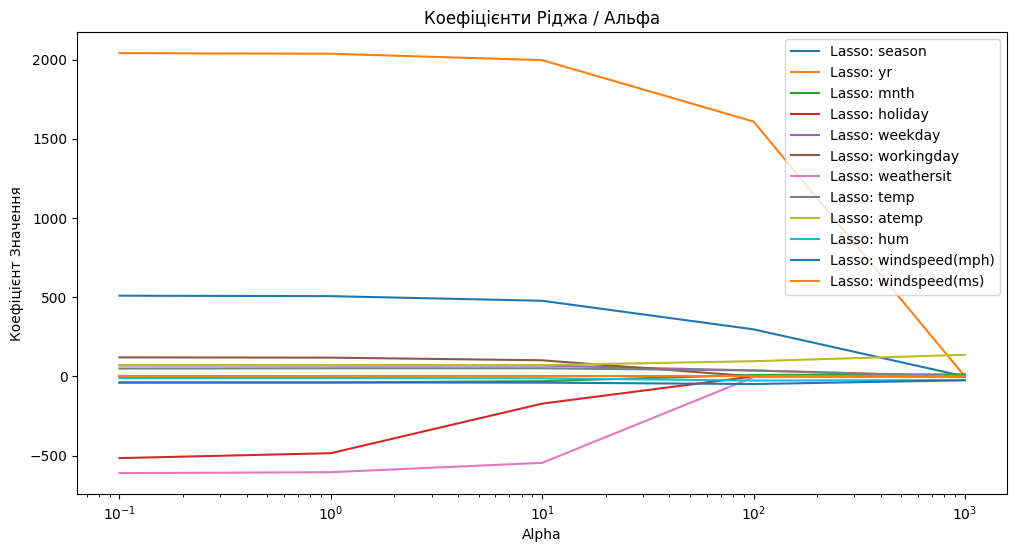

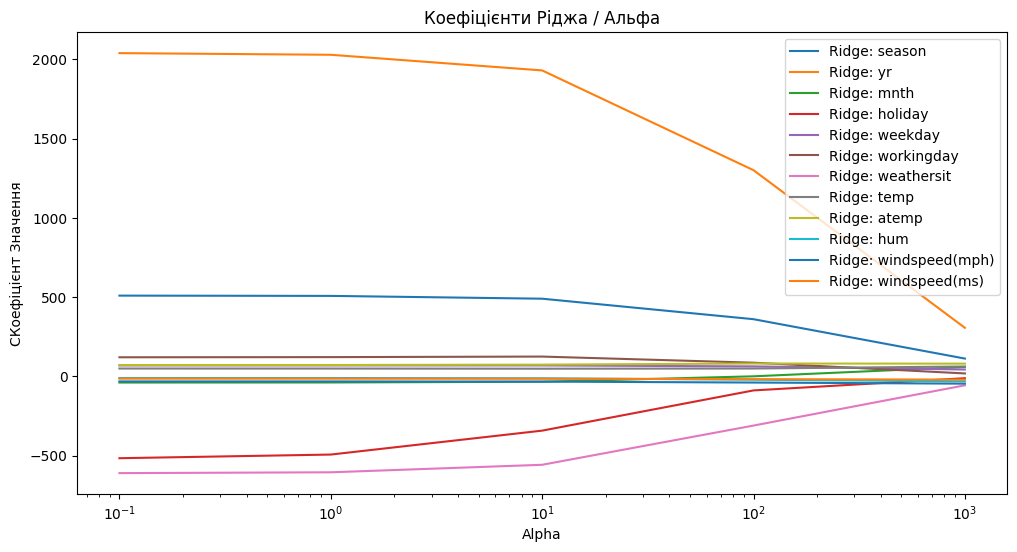

In [17]:
plt.figure(figsize=(12, 6))
for i in range(len(feature_names)):
    plt.plot(alphas, coefs_lasso[:, i], label=f"Lasso: {feature_names[i]}")

plt.xscale('log')
plt.title('Коефіцієнти Ріджа / Альфа')
plt.xlabel('Alpha')
plt.ylabel('Коефіцієнт Значення')
plt.legend()
plt.axis('tight')
plt.show()
plt.figure(figsize=(12, 6))
for i in range(len(feature_names)):
    plt.plot(alphas, coefs_ridge[:, i], label=f'Ridge: {feature_names[i]}')
plt.xscale('log')
plt.title('Коефіцієнти Ріджа / Альфа')
plt.xlabel('Alpha')
plt.ylabel('CКоефіцієнт Значення')
plt.legend()
plt.axis('tight')
plt.show()

Lasso регуляризатор: 

•  агресивніше зменшує ваги при тому самому значенні alpha порівняно з Ridge. Це видно з графіків: ваги для Lasso швидко зменшуються до нуля, в той час як для Ridge вони зменшуються, але залишаються ненульовими навіть при великих значеннях alpha.

•  може виключати одну з ознак `windspeed` за будь-якого значення alpha > 0. Це відбувається через те, що Lasso використовує L1-регуляризацію, яка має властивість встановлювати деякі ваги рівними нулю. Ridge, який використовує L2-регуляризацію, не виключає ознаки повністю, він лише робить їх ваги дуже малими.

•  підходить для відбору неінформативних ознак. Оскільки Lasso здатний встановлювати ваги рівними нулю, він дозволяє виключати ознаки, які не мають суттєвого впливу на модель. Ridge зменшує ваги, але не виключає ознаки повністю, тому він менше підходить для відбору неінформативних ознак.

Якщо значення alpha для Lasso стає дуже великим, то всі ваги збільшуються до нуля. Це трапляється через те, що Lasso використовує L1-регуляризацію, яка штрафує модель за великі значення ваг шляхом додавання модулів ваг до функції втрат. При великих значеннях alpha цей штраф стає надто великим, і модель стає вимушено простіше, доводячи всі ваги до нуля.


Найкраще alpha: 1.0


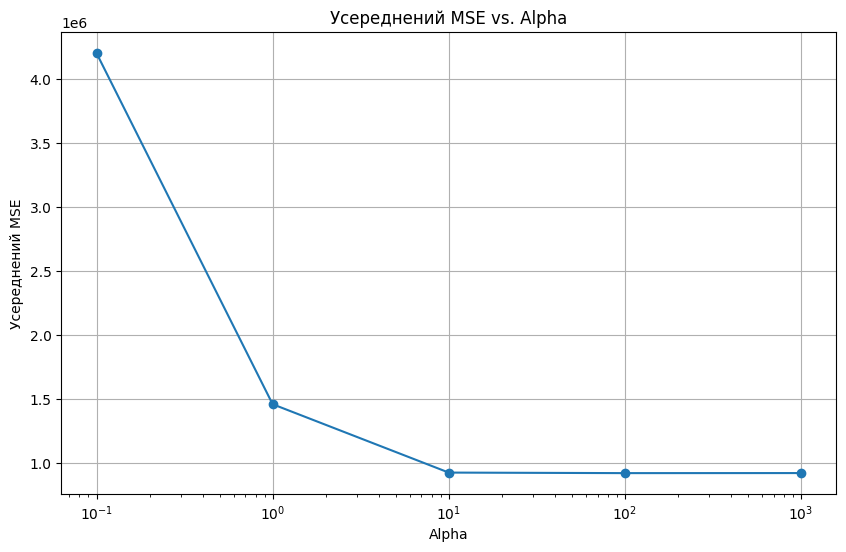

Навчені ваги:
season: 506.5512786498074
yr: 2036.2316676979037
mnth: -38.07827028932167
holiday: -484.65194618654056
weekday: 68.93837479133958
workingday: 118.4475975866837
weathersit: -604.5667118927049
temp: 51.363260585616366
atemp: 69.91273749012187
hum: -10.352705204636573
windspeed(mph): -38.34106761310847
windspeed(ms): -0.0


In [19]:
from sklearn.linear_model import LassoCV

alphas = [0.1, 1, 10, 100, 1000]
lasso_cv_regressor = LassoCV(alphas=alphas, cv=3)
lasso_cv_regressor.fit(X, y)
best_alpha = lasso_cv_regressor.alpha_
print(f"Найкраще alpha: {best_alpha}")
mse_path = lasso_cv_regressor.mse_path_.mean(axis=1)
def create_plot(alphas, mse, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, mse, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale('log')
    plt.grid()
    plt.show()
create_plot(alphas, mse_path, "Усереднений MSE vs. Alpha", "Alpha", "Усереднений MSE")
lasso_cv_coefs = lasso_cv_regressor.coef_
print("Навчені ваги:")
for feature, coefficient in zip(feature_names, lasso_cv_coefs):
    print(f"{feature}: {coefficient}")

Значення alpha, що відповідають мінімумам MSE на кожному розбитті:
Розбиття 1: 0.1
Розбиття 2: 100.0
Розбиття 3: 0.1


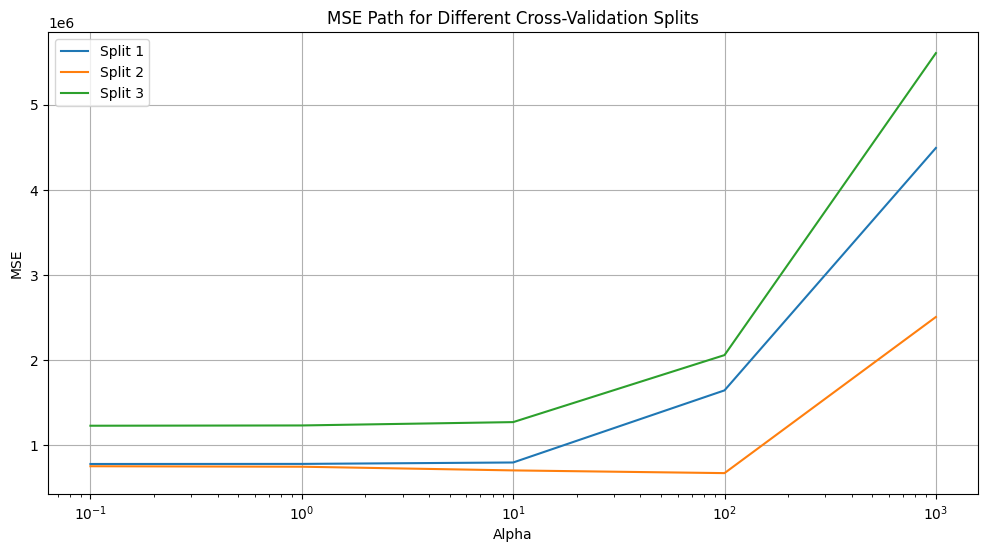

In [20]:
alphas = lasso_cv_regressor.alphas_
min_alpha_per_split = alphas[np.argmin(lasso_cv_regressor.mse_path_, axis=0)]
print("Значення alpha, що відповідають мінімумам MSE на кожному розбитті:")
for split, alpha in enumerate(min_alpha_per_split):
    print(f"Розбиття {split + 1}: {alpha}")
plt.figure(figsize=(12, 6))
for split, mse_values in enumerate(lasso_cv_regressor.mse_path_.T):
    plt.plot(alphas, mse_values, label=f"Split {split + 1}")
plt.title('Шлях MSE для різних розподілів перехресної перевірки')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

In [21]:
top_feature_indices = np.argsort(lasso_cv_coefs)[-4:][::-1]
top_features = [(feature_names[i], lasso_cv_coefs[i]) for i in top_feature_indices]
print("4 ознаки з найбільшими позитивними коефіцієнтами:")
for feature, coefficient in top_features:
    print(f"{feature}: {coefficient}")

4 ознаки з найбільшими позитивними коефіцієнтами:
yr: 2036.2316676979037
season: 506.5512786498074
workingday: 118.4475975866837
atemp: 69.91273749012187


yr (рік) - Чим вищий рік (2012), тим більше людей зацікавлені в прокаті велосипедів.

atemp (температура по відчуттям) - Збільшення температури по відчуттям може призводити до більшого попиту на велосипеди, оскільки люди більше схильні взяти велосипеди при комфортних температурних умовах.

season (сезон) - Літо і весна (сезони 2 і 1) можуть мати позитивний вплив на кількість прокатів велосипедів порівняно з іншими сезонами.

temp (температура) - Збільшення температури також може призводити до більшого попиту на велосипеди.

Щодо залежності cnt від цих ознак, на графіках, які ми раніше малювали, можлимо спостерігати зростаючу лінійну залежність для деяких з цих ознак. Наприклад, залежність від температури (temp) та температури по відчуттям (atemp) може бути лінійною, де більше значення цих ознак веде до більшої кількості прокатів велосипедів. Залежність від сезону (season) може бути менш лінійною, але все ж показувати зростання кількості прокатів у літні та весняні місяці.

Загально, здоровий глузд підказує, що при комфортних погодних умовах, вищій температурі, влітку і весною, із зростанням року, більше людей буде користуватися прокатом велосипедів.

In [22]:
top_negative_feature_indices = np.argsort(np.abs(lasso_cv_coefs))[:3]
top_negative_features = [(feature_names[i], lasso_cv_coefs[i]) for i in top_negative_feature_indices]
print("3 ознаки з найбільшими за модулем негативними коефіцієнтами:")
for feature, coefficient in top_negative_features:
    print(f"{feature}: {coefficient}")

3 ознаки з найбільшими за модулем негативними коефіцієнтами:
windspeed(ms): -0.0
hum: -10.352705204636573
mnth: -38.07827028932167


windspeed(mph) (швидкість вітру в милях на годину) - Зі збільшенням швидкості вітру може зменшуватися кількість прокатів велосипедів, оскільки не комфортні погодні умови можуть зменшити бажання людей користуватися велосипедами.

weathersit (оцінка сприятливості погоди) - Якщо погода несприятлива (висока оцінка), то це може призводити до зменшення кількості прокатів велосипедів.

hum (вологість) - Зі збільшенням вологості може зменшуватися кількість прокатів велосипедів, оскільки вологість також може впливати на комфортність катання.

На візуалізаціях можлимо спостерігати, що залежність cnt від цих ознак може бути не лінійною та зменшуватися зі збільшенням значень цих ознак. Це логічно, оскільки негативний вплив погодних умов (швидкість вітру, оцінка сприятливості погоди та вологість) може призводити до меншої кількості прокатів велосипедів.

In [25]:
windspeed_ms = -0.0


У цій лабораторній я розглянув процес навчання лінійної регресії з регуляризацією за допомогою Lasso та Ridge на прикладі прогнозу кількості прокатів велосипедів.

Вивчив дані про прокат велосипедів, провів візуалізацію та дослідив залежності між різними ознаками та цільовою змінною "кількість прокатів велосипедів" (cnt).
Використовуючи лінійну регресію з L1-регуляризацією та L2-регуляризацією, навчив моделі та вивчив ваги коефіцієнтів.
За допомогою крос-валідації та методу LassoCV, визначив оптимальне значення параметра регуляризації (alpha) для моделі Lasso.
Визначив ознаки, які мають найбільший позитивний та негативний вплив на кількість прокатів велосипедів.
За допомогою регуляризації L1, модель виключила ознаку "windspeed(ms)", оскільки вона була ідентичною до іншої ознаки і не вносила додаткової інформації.
Ця робота допомогла краще зрозуміти процес навчання лінійної регресії з регуляризацією, відбір важливих ознак та оптимізацію моделі для прогнозування кількості прокатів велосипедів.